In [1]:
import networkx
import math
import scipy.optimize
import numpy
import sys
from scipy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
import pywt
import scipy.fftpack
import random
import operator
import copy
from collections import deque
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from matplotlib.lines import Line2D
from lib.io import *
from lib.vis import *
from lib.graph_signal_proc import *
from lib.netpros import *
from lib.syn import *
from lib.experiments import *
from lib.static import *
from lib.datasets import *

In [2]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
F = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G) 

In [7]:
F.shape

(8640, 100)

In [3]:
algs = [OptWavelets(n=20), OptWavelets(), GNCWavelets(), Fourier(), HWavelets()]

comp_ratios = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30]

res, time = compression_experiment_static(G, F[8639:8640], algs, comp_ratios)

alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d7f0>  i =  0  r =  0
5  x  4
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d7f0>  i =  0  r =  1
10  x  8
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d7f0>  i =  0  r =  2
15  x  13
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d7f0>  i =  0  r =  3
20  x  18
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d7f0>  i =  0  r =  4
25  x  22
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d7f0>  i =  0  r =  5
30  x  26
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d160>  i =  0  r =  0
5  x  4
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d160>  i =  0  r =  1
10  x  9
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d160>  i =  0  r =  2
15  x  13
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d160>  i =  0  r =  3
20  x  17
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d160>  i =  0  r =  4
25  x  22
alg =  <lib.static.OptWavelets object at 0x7f0f0bc8d160>  i =  0  r =  5
30  x  26
alg =  <li

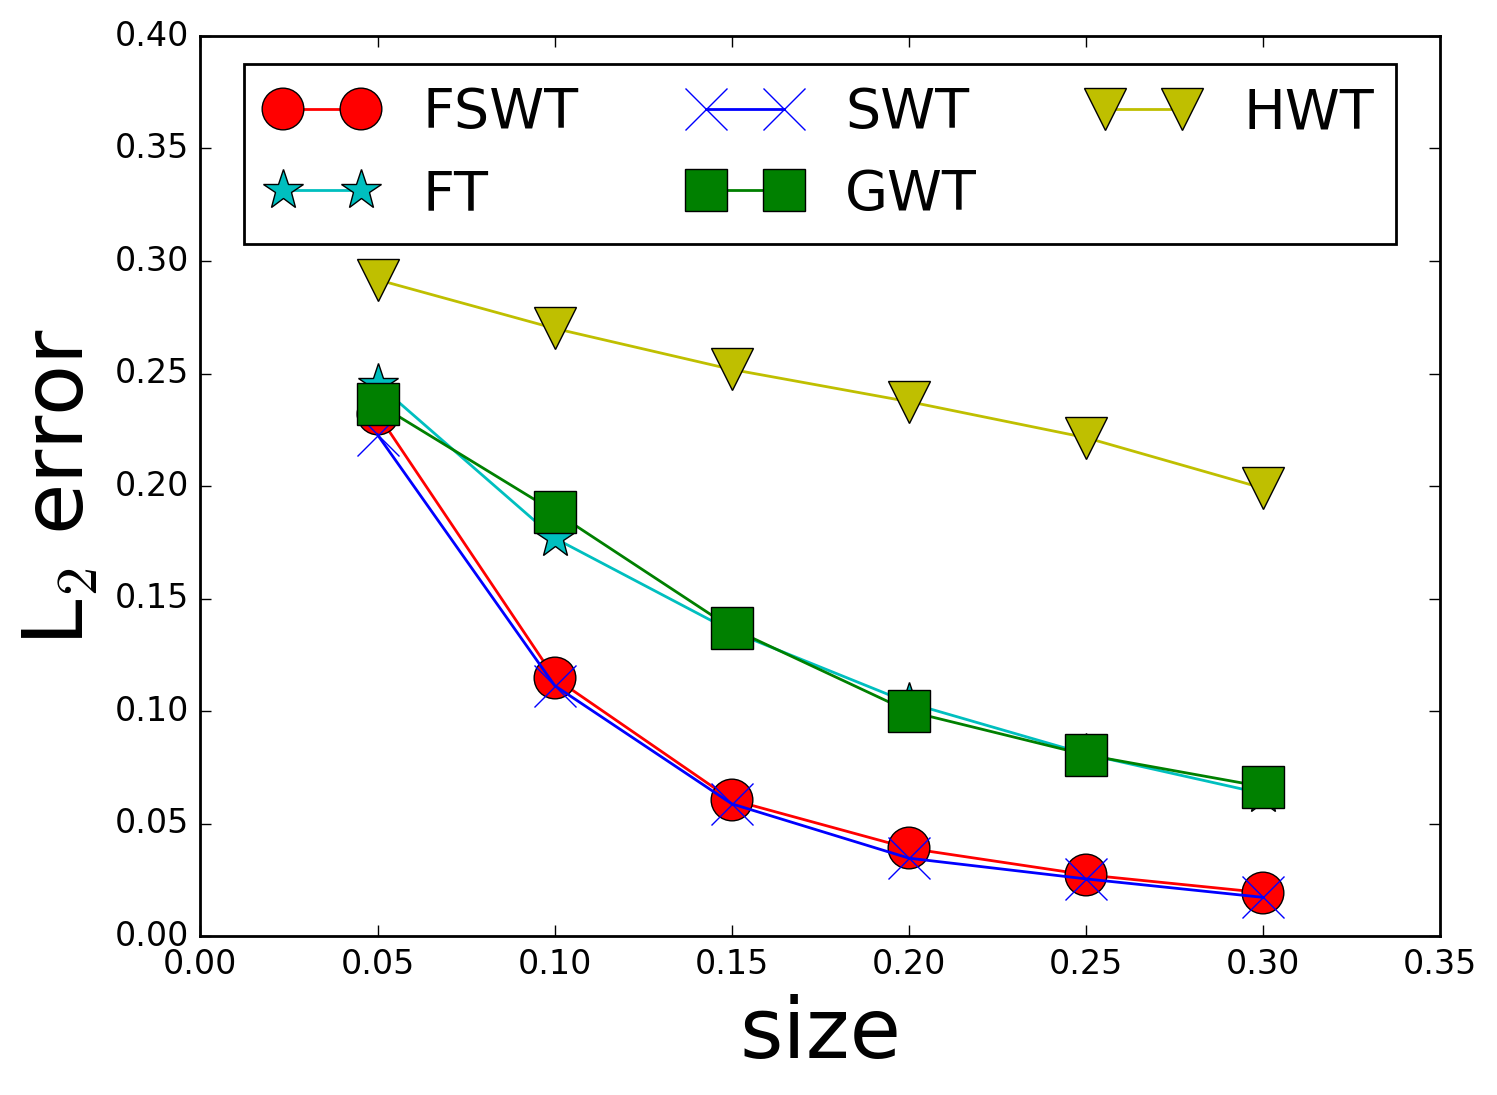

In [4]:
plot_compression_experiments(res, comp_ratios, "figs/compression_small_traffic.png", .40)
Image(filename="figs/compression_small_traffic.png")

In [3]:
algs = [OptWavelets(n=20), GNCWavelets(), Fourier()]

comp_ratios = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30]

res, time = compression_experiment_static(G, FT_h, algs, comp_ratios)

NameError: name 'G' is not defined

In [2]:
G = read_graph(traffic["path"] + "traffic.graph", traffic["path"] + "traffic_100.data")
F = read_dyn_graph(traffic["path"] + "traffic", traffic["num_snaps"], G) 


FT_h = []

for i in range(0, 12*5, 12):
    FT_h.append(F[i])
    
FT_h = numpy.array(FT_h)

In [3]:
algs = [OptWavelets(n=20), GNCWavelets(), Fourier()]

comp_ratios = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30]

res, time = compression_experiment_static(G, F[4:5], algs, comp_ratios)

alg =  <lib.static.OptWavelets object at 0x7f938c0f0a20>  i =  0  r =  0
96  x  78
alg =  <lib.static.OptWavelets object at 0x7f938c0f0a20>  i =  0  r =  1
192  x  158
alg =  <lib.static.OptWavelets object at 0x7f938c0f0a20>  i =  0  r =  2
288  x  236
alg =  <lib.static.OptWavelets object at 0x7f938c0f0a20>  i =  0  r =  3
384  x  315
alg =  <lib.static.OptWavelets object at 0x7f938c0f0a20>  i =  0  r =  4
480  x  408
alg =  <lib.static.OptWavelets object at 0x7f938c0f0a20>  i =  0  r =  5
576  x  504
alg =  <lib.static.GNCWavelets object at 0x7f938c0f0cc0>  i =  0  r =  0
alg =  <lib.static.GNCWavelets object at 0x7f938c0f0cc0>  i =  0  r =  1
alg =  <lib.static.GNCWavelets object at 0x7f938c0f0cc0>  i =  0  r =  2
alg =  <lib.static.GNCWavelets object at 0x7f938c0f0cc0>  i =  0  r =  3
alg =  <lib.static.GNCWavelets object at 0x7f938c0f0cc0>  i =  0  r =  4
alg =  <lib.static.GNCWavelets object at 0x7f938c0f0cc0>  i =  0  r =  5
alg =  <lib.static.Fourier object at 0x7f938c0f0d30>  

In [6]:
res

{'GWT': array([ 1052.82835602,   773.25358468,   917.22834658,   369.19419976,
          261.86756347,   237.66931347]),
 'SWT': array([ 975.25782916,  674.88462866,  330.13857273,  210.6491939 ,
         182.47613457,   68.36337777])}

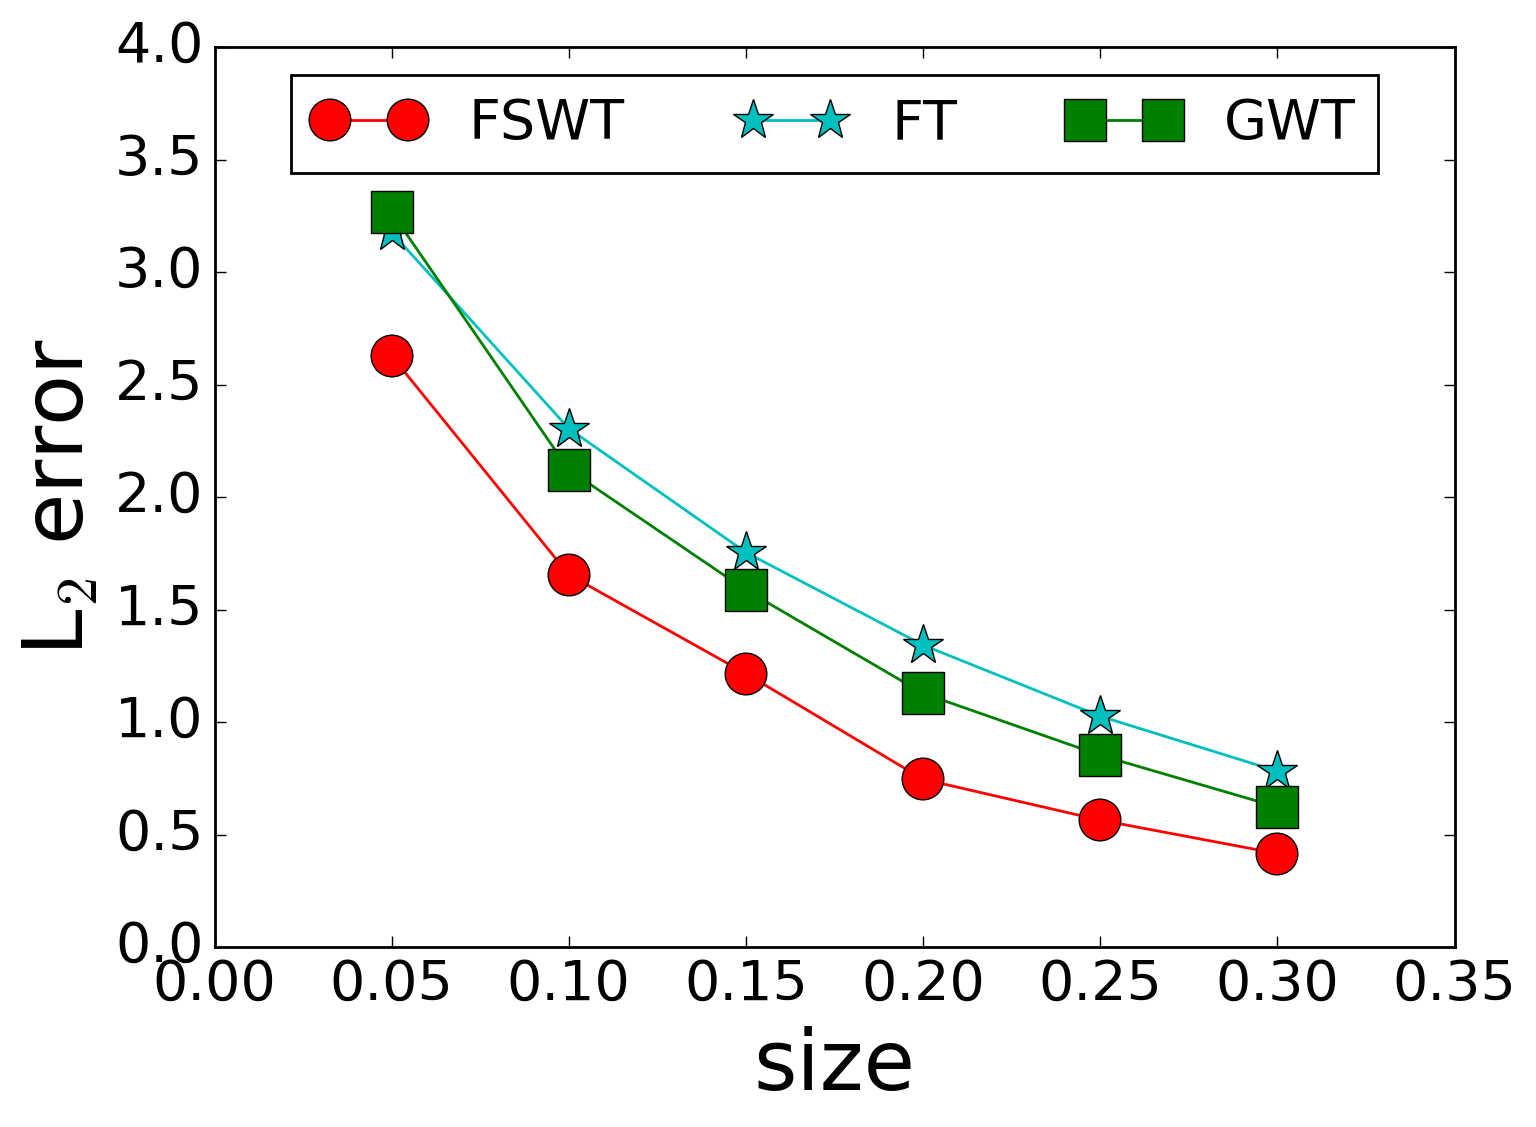

In [6]:
plot_compression_experiments(res, comp_ratios, "figs/compression_traffic.png", 4.)
Image(filename="figs/compression_traffic.png")

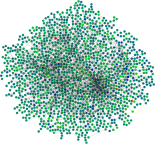

In [3]:
G = read_graph(human["path"] + "human_9.graph", human["path"] + "human_9.data")
F = read_values(human["path"] + "human_9.data", G) 

draw_graph_with_values(G, "human.dot")
! sfdp -Goverlap=prism -Tsvg human.dot > human.svg

from IPython.display import SVG

SVG(filename='human.svg')

In [4]:
algs = [OptWavelets(n=20), GNCWavelets(), Fourier()]

comp_ratios = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30]

res, time = compression_experiment_static(G, numpy.array([F]), algs, comp_ratios)

alg =  <lib.static.OptWavelets object at 0x7fb26bc67ba8>  i =  0  r =  0
69  x  56
alg =  <lib.static.OptWavelets object at 0x7fb26bc67ba8>  i =  0  r =  1
138  x  113
alg =  <lib.static.OptWavelets object at 0x7fb26bc67ba8>  i =  0  r =  2
208  x  171
alg =  <lib.static.OptWavelets object at 0x7fb26bc67ba8>  i =  0  r =  3
277  x  228
alg =  <lib.static.OptWavelets object at 0x7fb26bc67ba8>  i =  0  r =  4
346  x  285
alg =  <lib.static.OptWavelets object at 0x7fb26bc67ba8>  i =  0  r =  5
416  x  345
alg =  <lib.static.GNCWavelets object at 0x7fb26bc67be0>  i =  0  r =  0
alg =  <lib.static.GNCWavelets object at 0x7fb26bc67be0>  i =  0  r =  1
alg =  <lib.static.GNCWavelets object at 0x7fb26bc67be0>  i =  0  r =  2
alg =  <lib.static.GNCWavelets object at 0x7fb26bc67be0>  i =  0  r =  3
alg =  <lib.static.GNCWavelets object at 0x7fb26bc67be0>  i =  0  r =  4
alg =  <lib.static.GNCWavelets object at 0x7fb26bc67be0>  i =  0  r =  5
alg =  <lib.static.Fourier object at 0x7fb26bc67c18>  

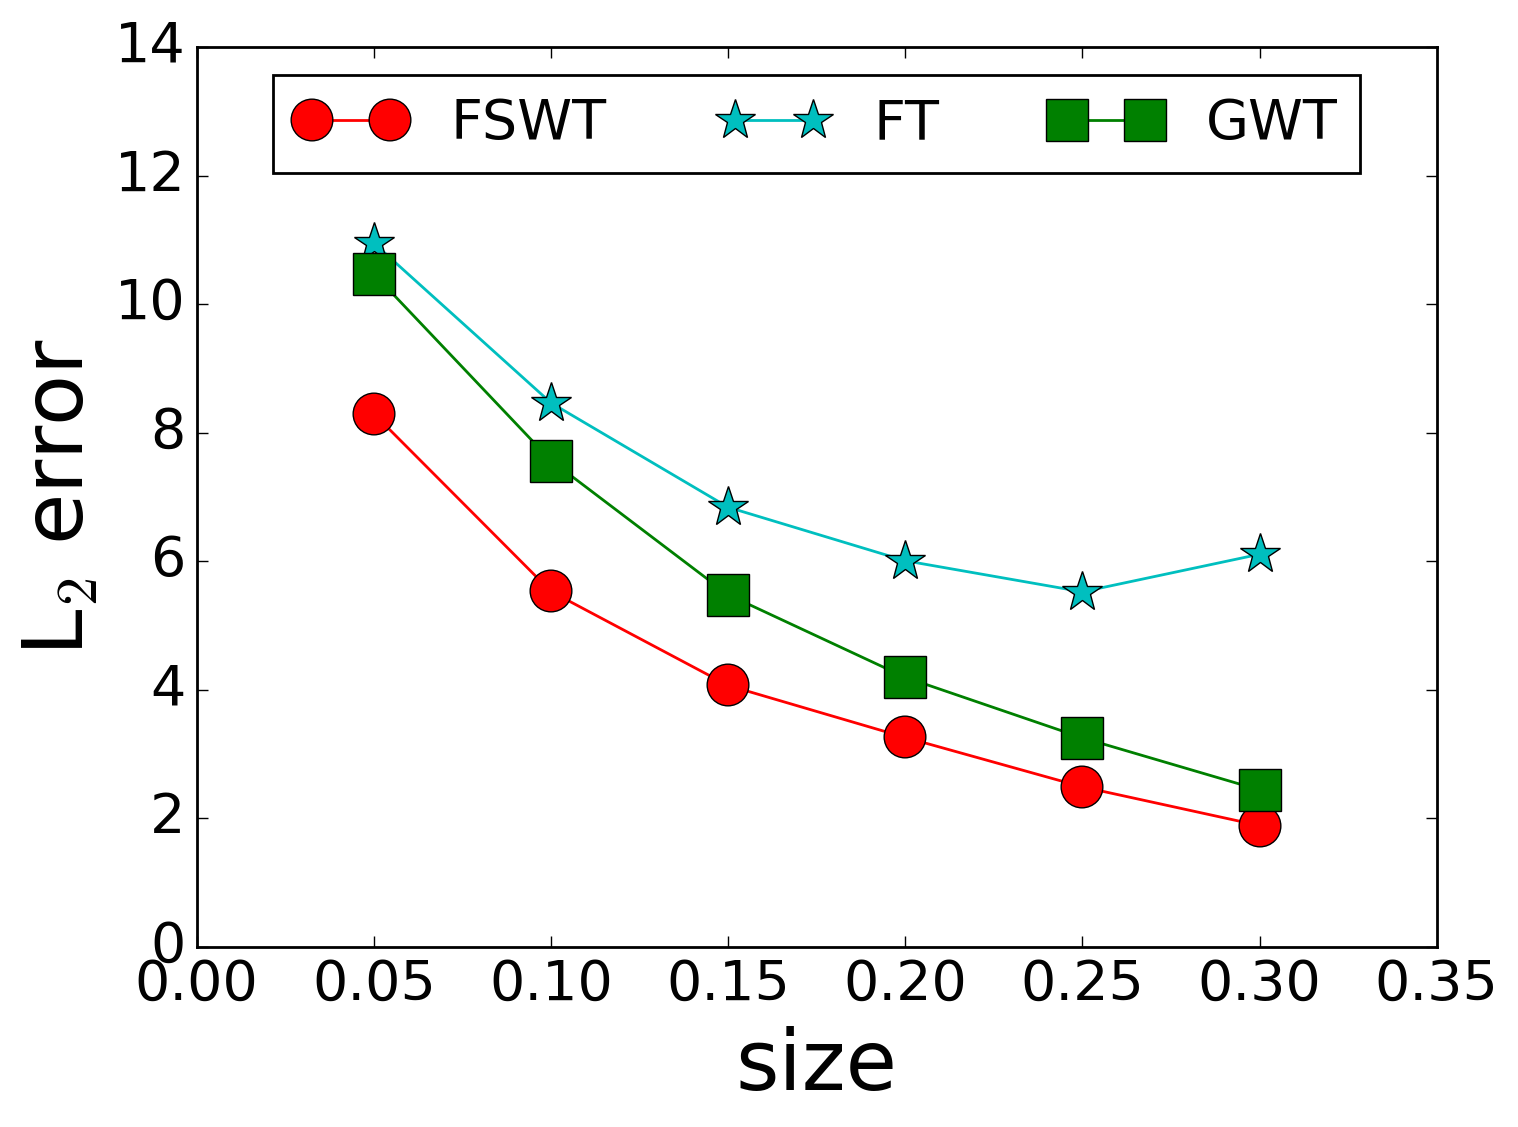

In [7]:
plot_compression_experiments(res, comp_ratios, "figs/compression_human.png", 14.)
Image(filename="figs/compression_human.png")

In [9]:
def generate_dyn_heat(G, s, jump, n):
    Fs = []
    L = networkx.normalized_laplacian_matrix(G)
    F0s = []
    seeds = []

    for i in range(s):
        F0 = numpy.zeros((1,len(G.nodes())))
        v = random.randint(0, len(G.nodes())-1)
        seeds.append(1.)
        F0[0,v] = len(G.nodes())
        F0s.append(F0)
    
    for j in range(n):
        FIs = []
        for i in range(s):
            FI = scipy.sparse.csr_matrix.multiply(linalg.expm(-j*jump*L), F0s[i])[:,seeds[i]]
            FIs.append(numpy.asarray(FI.transpose())[0])
        
        Fs.append(numpy.sum(FIs, axis=0).tolist())
    
    return numpy.array(Fs)

In [11]:
G = read_graph(facebook["path"] + "facebook.graph", facebook["path"] + "facebook_198.data")

syn_F = generate_dyn_heat(G, 4, 1., 1)

/usr/local/lib/python3.4/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:237: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/usr/local/lib/python3.4/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:155: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


In [6]:
f = open("facebook.data", 'w')

i = 0
for v in G.nodes():
    value = syn_F[9][i]
    f.write(str(v)+","+str(value)+"\n")
    
f.close()

In [40]:
set_f(G, syn_F[3])
draw_graph_with_values(G, "facebook_heat.dot", 1., 0.)

!sfdp -Goverlap=prism -Tsvg facebook_heat.dot > facebook_heat.svg

from IPython.display import SVG

SVG(filename='facebook_heat.svg')

In [14]:
print(syn_F[0].sum())

0.0


In [16]:
len(G.edges())

23593

In [41]:
algs = [GNCWavelets(), OptWavelets(n=20), Fourier()]

comp_ratios = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30]

res, time = compression_experiment_static(G, numpy.array([syn_F[3]]), algs, comp_ratios)

alg =  <lib.static.GNCWavelets object at 0x7fab2b446128>  i =  0  r =  0
alg =  <lib.static.GNCWavelets object at 0x7fab2b446128>  i =  0  r =  1
alg =  <lib.static.GNCWavelets object at 0x7fab2b446128>  i =  0  r =  2
alg =  <lib.static.GNCWavelets object at 0x7fab2b446128>  i =  0  r =  3
alg =  <lib.static.GNCWavelets object at 0x7fab2b446128>  i =  0  r =  4
alg =  <lib.static.GNCWavelets object at 0x7fab2b446128>  i =  0  r =  5
alg =  <lib.static.OptWavelets object at 0x7fab2b446160>  i =  0  r =  0
89  x  73
alg =  <lib.static.OptWavelets object at 0x7fab2b446160>  i =  0  r =  1
178  x  162
alg =  <lib.static.OptWavelets object at 0x7fab2b446160>  i =  0  r =  2
267  x  207
alg =  <lib.static.OptWavelets object at 0x7fab2b446160>  i =  0  r =  3
356  x  296
alg =  <lib.static.OptWavelets object at 0x7fab2b446160>  i =  0  r =  4
445  x  385
alg =  <lib.static.OptWavelets object at 0x7fab2b446160>  i =  0  r =  5
534  x  474
alg =  <lib.static.Fourier object at 0x7fab2b446198>  

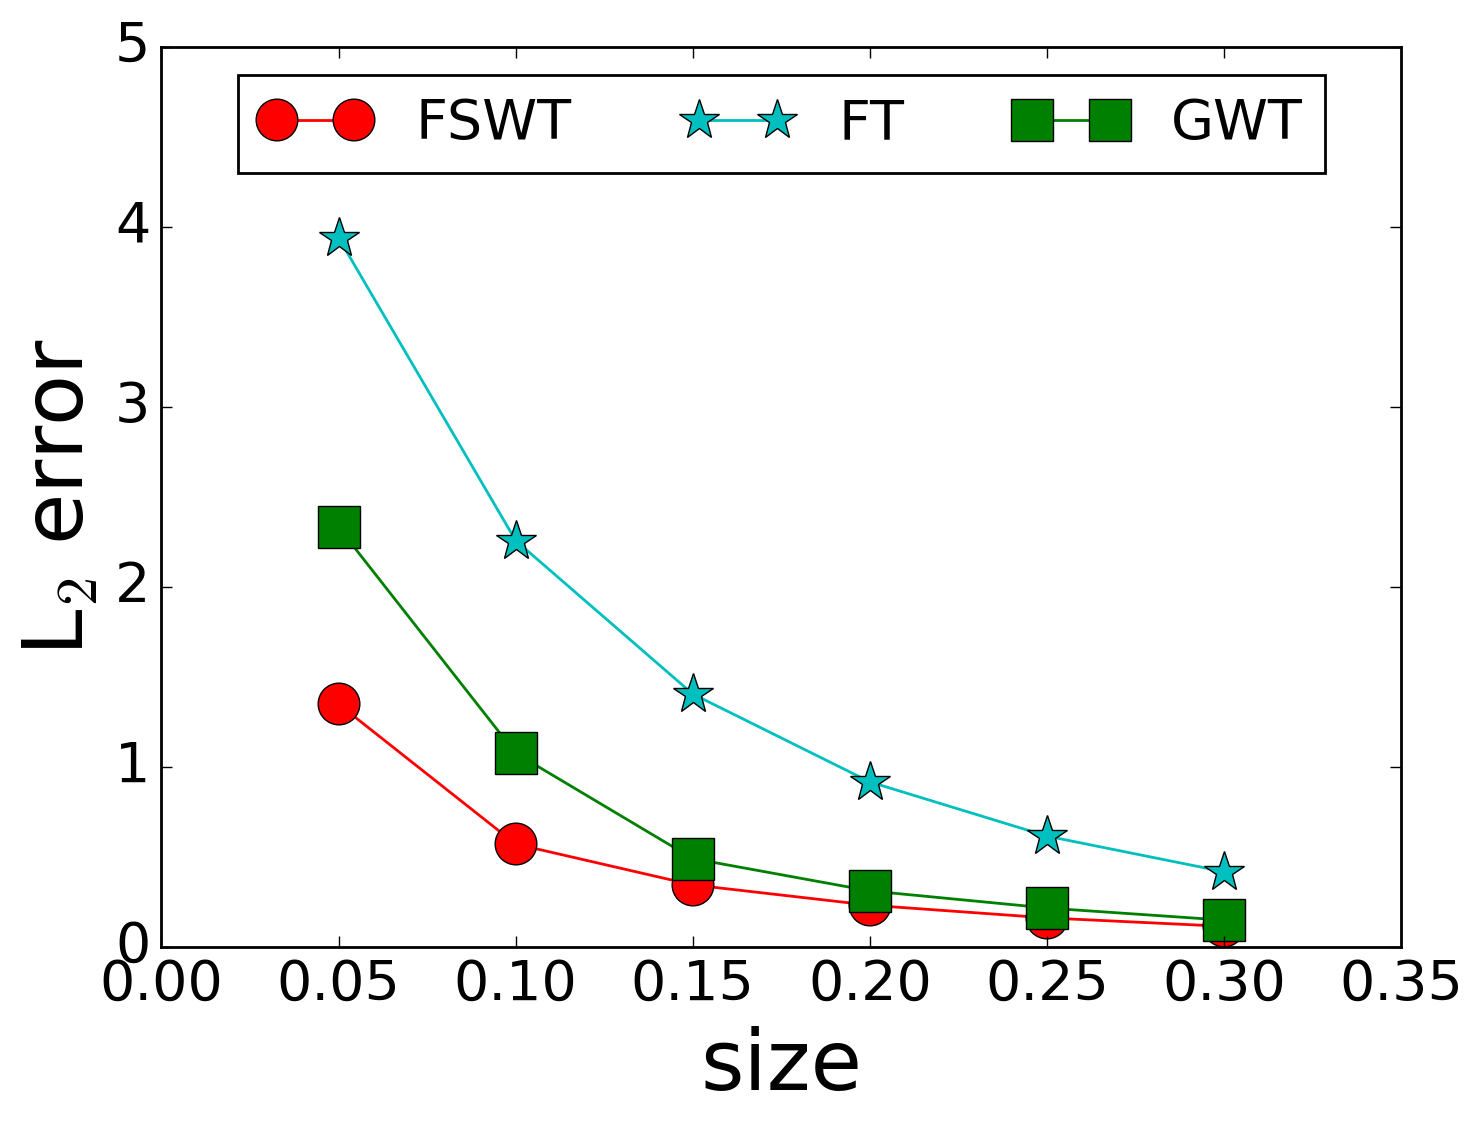

In [50]:
plot_compression_experiments(res, comp_ratios, "figs/compression_facebook.png", 5)
Image(filename="figs/compression_facebook.png")

In [48]:
for k in res:
    res[k] = res[k] / 10

In [49]:
res

{'FSWT': array([ 1.34960438,  0.57194257,  0.34507915,  0.23209993,  0.16172069,
         0.11492658]),
 'FT': array([ 3.94038274,  2.25808228,  1.40542889,  0.91700775,  0.61590011,
         0.41796141]),
 'GWT': array([ 2.33196867,  1.07685532,  0.49102741,  0.31165912,  0.21655145,
         0.14925095])}

In [2]:
G = read_graph(wiki["path"] + "wiki.graph", wiki["path"] + "wiki_0.data")
F = read_values(wiki["path"] + "wiki_13.data", G) 

In [ ]:
algs = [GNCWavelets(), OptWavelets(n=20), Fourier()]

comp_ratios = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30]

res, time = compression_experiment_static(G, numpy.array([F]), algs, comp_ratios)

alg =  <lib.static.GNCWavelets object at 0x7f2e8f8b4198>  i =  0  r =  0


In [9]:
m = 0
j = 0
for i in range(350):
    F = read_values(wiki["path"] + "wiki_"+str(i)+".data", G) 
    if F.sum() > m:
        m = F.sum()
        j = i
        
print(j)

13


In [11]:
F = read_values(wiki["path"] + "wiki_13.data", G) 

In [12]:
F

array([ 0.00102648,  0.00102648,  0.00102648, ...,  0.00102648,
        0.00102648,  0.00102648])